In [61]:
import baostock as bs
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [126]:
def candle(stock_code, year_delta=5):
    lg = bs.login()
    startdate = (dt.datetime.now() - dt.timedelta(days = year_delta * 365)).strftime('%Y-%m-%d')
    enddate = dt.datetime.now().strftime('%Y-%m-%d')
    data_list = []
    rs = bs.query_history_k_data_plus(stock_code, "date,code,open,high,low,close", start_date=startdate, end_date=enddate, frequency="d")
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
    bs.logout()
    
    result = pd.DataFrame(data_list, columns=rs.fields)
    result['date'] = pd.to_datetime(result['date']).apply(lambda x : mdates.date2num(x.to_pydatetime()))
    tuples = [tuple([result.iloc[x,0], float(result.iloc[x,2]),
                float(result.iloc[x,3]), float(result.iloc[x,4]), 
                float(result.iloc[x,5])]) for x in range(len(result))]
    fig, ax = plt.subplots()
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    candlestick_ohlc(ax, tuples, width = .6, colorup = 'r', colordown = 'g')
    plt.gcf().autofmt_xdate()
    plt_title = stock_code + '近' +  str(year_delta) + '年日线图（截止' + enddate + ')'
    plt.title(plt_title)
    #result.to_csv(stock_code + '近' +  str(year_delta) + '年日线数据_' + e_date + '.csv')
    #plt.savefig(plt_title + '.png')
    plt.show()
    return

login success!


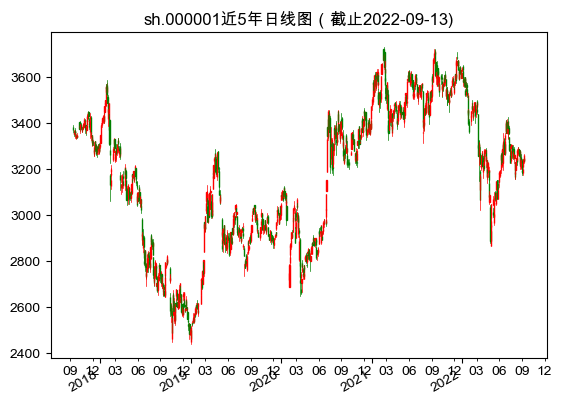

logout success!


In [127]:
candle('sh.000001')